### KNN (K-Nearest Neighbors) Lab

In this lab we will attempt to classify, whether or not a wine is HIGH or LOW quality. This is a classification task since we will attempt to discrimnate between these two options.  To do so, we will take as input features of each wine and previous labels of HIGH or LOW quality.

In [17]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

# Load in the dataset
df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


#### Classifying high quality wines
- In this dataset, `quality` is a numeric column, if we were performing regression, we could predict this value.
- Since we are performing classification, we will predict `high_quality` which is 1 or 0, a binary label.
- What is the baseline accuracy that we should attempt to beat?

In [5]:
# TODO 
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red,high_quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


In [35]:
import statsmodels.formula.api as sm
import pandas as pd


#df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")

model = sm.logit(
    "high_quality ~ residual_sugar + pH + alcohol",
    data = df
).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.418431
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           high_quality   No. Observations:                 6497
Model:                          Logit   Df Residuals:                     6493
Method:                           MLE   Df Model:                            3
Date:                Tue, 15 Nov 2016   Pseudo R-squ.:                  0.1557
Time:                        15:17:54   Log-Likelihood:                -2718.5
converged:                       True   LL-Null:                       -3219.8
                                        LLR p-value:                5.039e-217
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        -11.7871      0.803    -14.674      0.000       -13.361   -10.213
residual_sugar     0.0471      0.009      5.441      0.000         0.030     0.064
pH                 0.1419      0.217      0.654      0.513        -0.283     0.567
alcohol            0.8946      0.031     28.600      0.000         0.833     0.956
==================================================================================
"""

In [ ]:
df["hi"]

In [14]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red,high_quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740,-0.049447
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036,-0.151714
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397,0.054444
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821,-0.063992
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678,-0.161781
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644,0.014767
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357,-0.051226
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645,-0.275441
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129,0.028149
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218,0.033971


In [7]:
# TODO
df.dropna(inplace=True)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


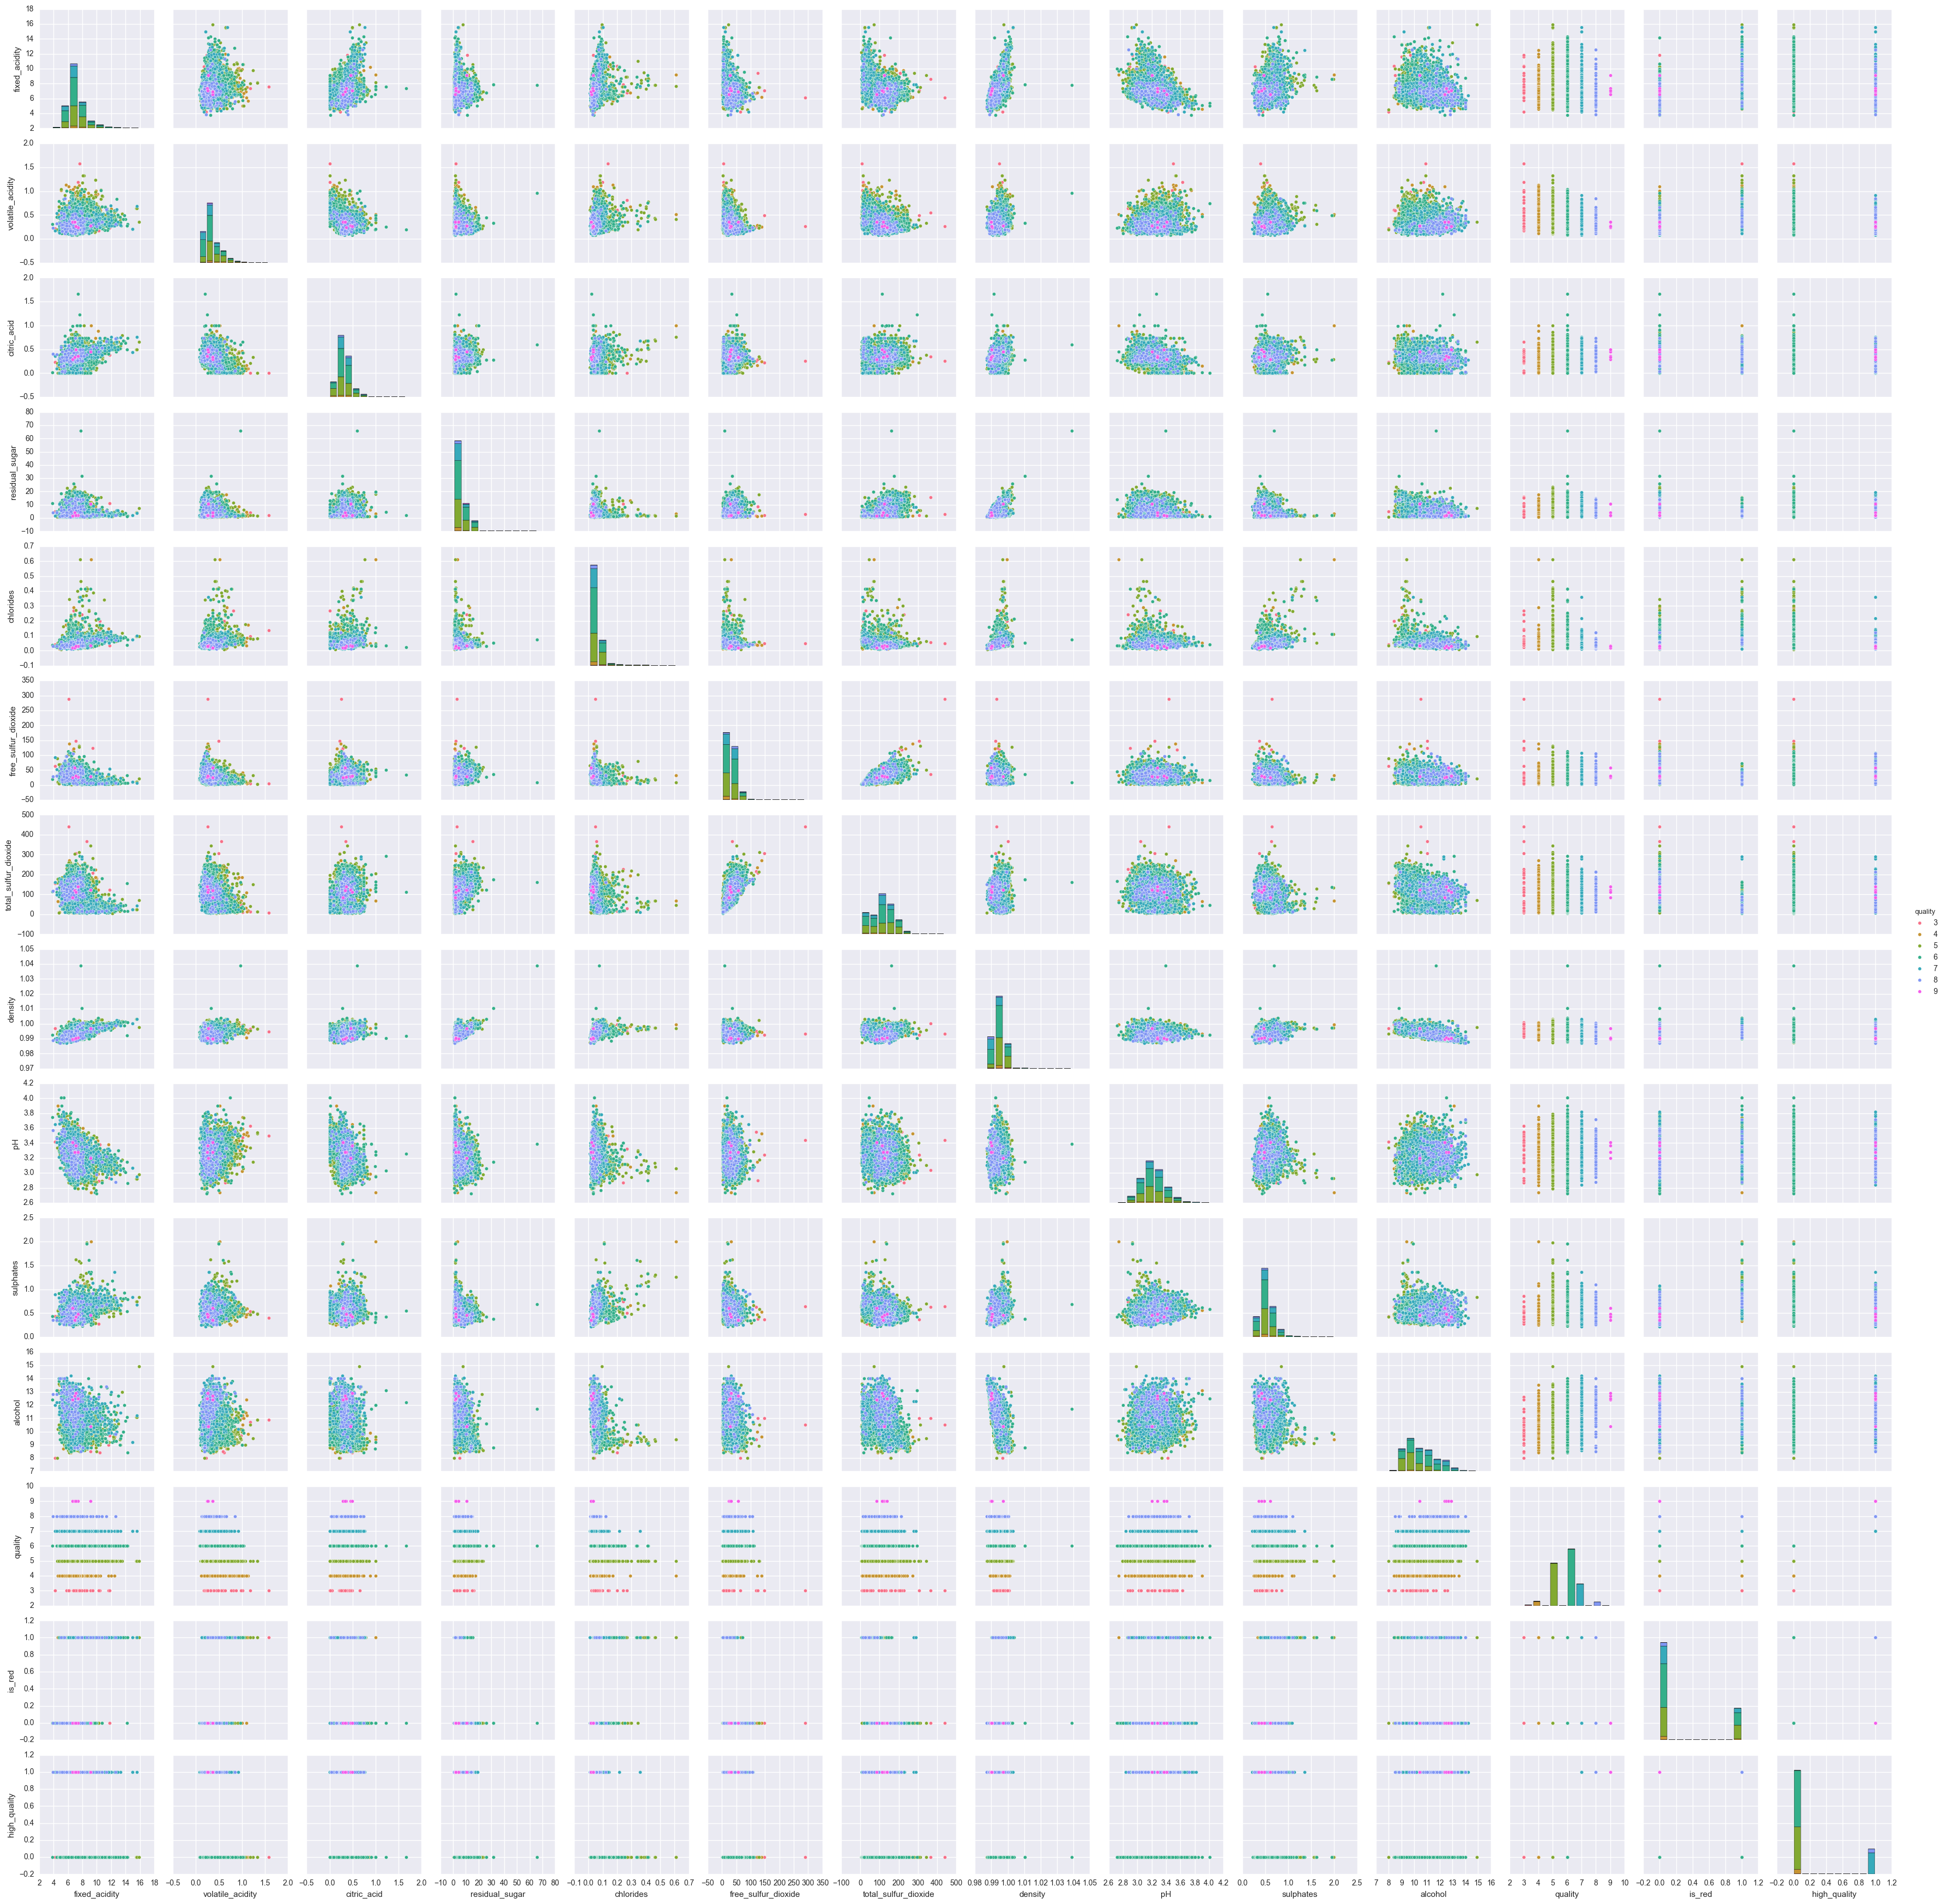

In [13]:
sns.pairplot(df , hue = "quality")

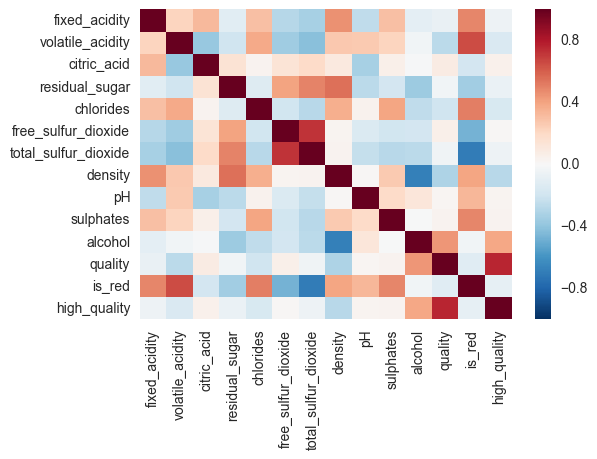

In [11]:
sns.heatmap(df.corr())

In [15]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
is_red                  float64
high_quality            float64
dtype: object

#### What features are important to predict high quality wines?
- Let's explore the dataset

In [4]:
# TODO

In [5]:
# TODO

#### Build K-Nearest Neighbors model to predict whether or not a wine is high quality
- Select features you think will be predictive of high quality wines
- Scale the dataset (remember, this is so that each variable contributes equally to the distance computation)
- Evaluate the accuracy of your model using cross-validation
- Evaluate different values of `n` to see how the number of neighbors affects the classification accuracy

In [33]:
# TODO
kval = 5
model = KNeighborsClassifier(n_neighbors=kval,n_jobs=-1)#Classifier implementing the k-nearest neighbors vote)
X = df[["alcohol","volatile_acidity"]] 
Y= df["high_quality"]
acc = cross_val_score(model,X,Y,cv = 5)
print(acc)
acc.mean()

#"density""volatile_acidity"

[ 0.81230769  0.79        0.80831409  0.77598152  0.72286374]


0.78189340913128436

In [7]:
# TODO

In [ ]:
# normalization
X = preprocessing.minmax_scale(wine.iloc[:,:-1])
y = wine.iloc[:,-1]
neigh_model = neighbors.KNeighborsClassifier()
neigh_model.fit(X,y)
print 'score',neigh_model.score(X,y)

print cross_validation.cross_val_scor(neigh_model,X,y,cv = 5)

print cross_validation.cross_val_scor(neigh_model,X,y,cv = 5).mean()

In [ ]:
#standarization
X = preprocessing.scale(wine.iloc[:,:-1])
y = wine.iloc[:,-1]
neigh_model = neighbors.KNeighborsClassifier()
neigh_model.fit(X,y)
print 'score',neigh_model.score(X,y)

print cross_validation.cross_val_scor(neigh_model,X,y,cv = 5)

print cross_validation.cross_val_scor(neigh_model,X,y,cv = 5).mean()

In [ ]:
preprocessing.minmax_scale(wine.loc[])